# Lecture 08 Review of Histograms

In [20]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

In [21]:
top_movies = Table.read_table('data/top_movies_2017.csv')

In [22]:
this_year = 2023
ages = this_year - top_movies.column('Year')
top_movies = top_movies.with_column('Age', ages)
top_movies

Title,Studio,Gross,Gross (Adjusted),Year,Age
Gone with the Wind,MGM,198676459,1796176700,1939,84
Star Wars,Fox,460998007,1583483200,1977,46
The Sound of Music,Fox,158671368,1266072700,1965,58
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,41
Titanic,Paramount,658672302,1204368000,1997,26
The Ten Commandments,Paramount,65500000,1164590000,1956,67
Jaws,Universal,260000000,1138620700,1975,48
Doctor Zhivago,MGM,111721910,1103564200,1965,58
The Exorcist,Warner Brothers,232906145,983226600,1973,50
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,86


# Grouping by categorical variable
We can group our movies by the *categorical* variable 'Studio', to find out how many movies were produced by each studio, using the `group()` function.

In [35]:
studios = top_movies.group('Studio')
studios

Studio,count
AVCO,1
Buena Vista,35
Columbia,9
Disney,11
Dreamworks,3
Fox,24
IFC,1
Lionsgate,3
MGM,7
Metro,1


we can then go ahead and plot those in a bar plot. Remember. The First parameter is the variable to use on x-axis, second parameter is the variable to use on the y-axis. Check the [`bar()` documentation](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.barh.html#datascience.tables.Table.bar)

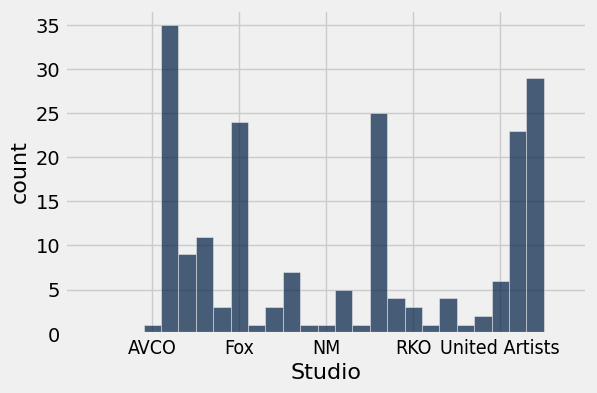

In [46]:
studios.bar(column_for_categories='Studio', select='count')

Let's make it better
- Sort the bars in decreasing order
- Only show the 10 largest studios
- Turn it around by 90 degrees

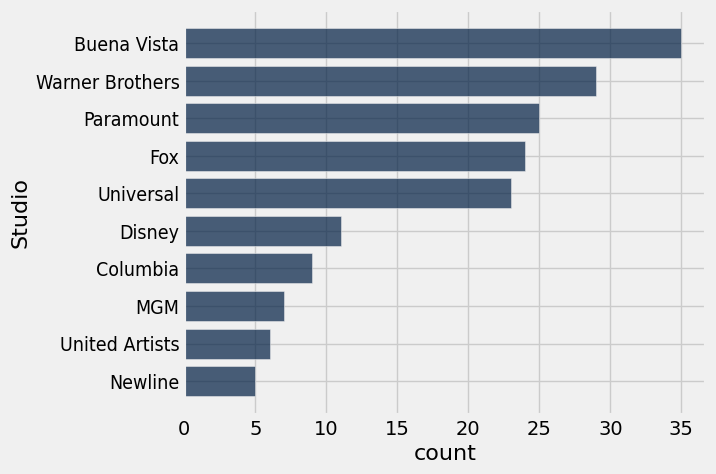

In [58]:
(top_movies
 .group('Studio')
 .sort('count', descending=True)
 .take(np.arange(0,10)) 
 .barh('Studio', 'count')
)

# Grouping by numerical variable
We want to find out something about the age distribition of movies. I.e. seeing how many movies were produced in different age brackets.

We fist calculate the age of all movies (as of 2023)

In [60]:
this_year = 2023
ages = this_year - top_movies.column('Year')
top_movies = top_movies.with_column('Age', ages)
top_movies

Title,Studio,Gross,Gross (Adjusted),Year,Age
Gone with the Wind,MGM,198676459,1796176700,1939,84
Star Wars,Fox,460998007,1583483200,1977,46
The Sound of Music,Fox,158671368,1266072700,1965,58
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,41
Titanic,Paramount,658672302,1204368000,1997,26
The Ten Commandments,Paramount,65500000,1164590000,1956,67
Jaws,Universal,260000000,1138620700,1975,48
Doctor Zhivago,MGM,111721910,1103564200,1965,58
The Exorcist,Warner Brothers,232906145,983226600,1973,50
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,86


we then group by the years using the `group()` function

In [68]:
age_groups = top_movies.group('Age')
age_groups

Age,count
6,3
7,9
8,6
9,3
10,4
11,3
12,2
13,3
14,5
15,3


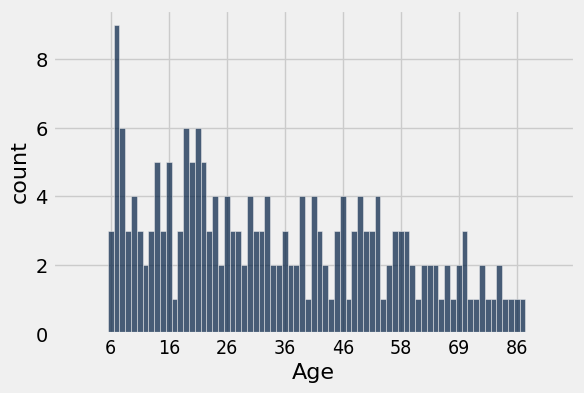

In [69]:
age_groups.bar('Age', 'count')

# Binning
This was a bit boring. We'd much rather create some groups (bins) in which we aggregate a ranges of ages.
I.e. count all moves that are 0-10 years old, all movies that are 10-20 years old etc

In [82]:
my_bins = np.arange(0, 100, 10)
binned_data = top_movies.bin('Age', bins = my_bins)
binned_data

bin,Age count
0,21
10,35
20,37
30,29
40,26
50,22
60,15
70,8
80,6
90,0


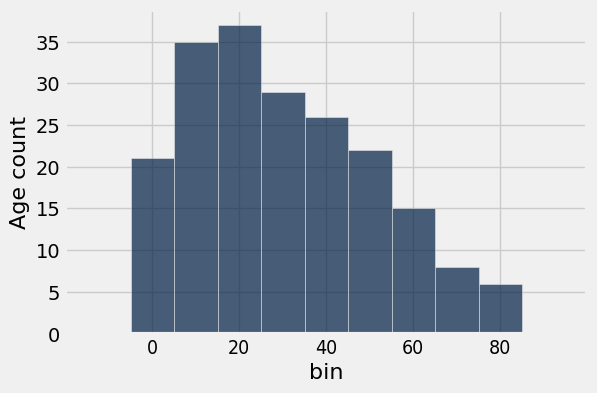

In [83]:
binned_data.bar('bin', 'Age count')

# Making a histogram
We are not fully satisfied. 
- The movies in the first bar are not e.g. 0 years old. They are between 0 and 10.
- Even worse: What happens if our bins are not uniform ... we loose our perspective on the x-axis

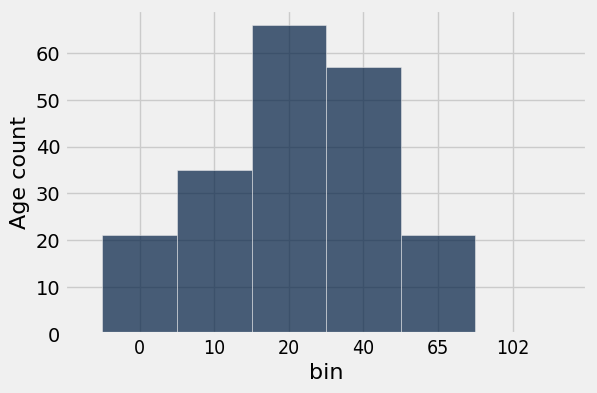

In [87]:
my_bins = make_array(0, 10, 20, 40, 65, 102)
binned_data = top_movies.bin('Age', bins = my_bins)
binned_data.bar('bin', 'Age count')

We can fix this by using the [`hist()` function](http://www.data8.org/datascience/_autosummary/datascience.tables.Table.hist.html#datascience.tables.Table.hist)

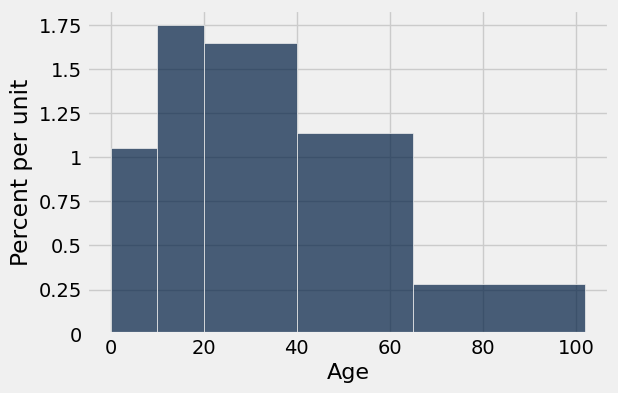

In [89]:
top_movies.hist('Age', bins = my_bins)

## What does the "percent per unit" mean?

Let's inspect our binned data

In [109]:
binned_data

bin,Age count,Percent
0,21,10.5
10,35,17.5
20,66,33
40,57,28.5
65,21,10.5
102,0,0


**Exercise:** Add a column containing the percentage of data in each bin.

In [110]:
share = 100 * binned_data.column('Age count') / binned_data.column('Age count').sum()
binned_data = binned_data.with_column('Percent', share)
binned_data

bin,Age count,Percent
0,21,10.5
10,35,17.5
20,66,33
40,57,28.5
65,21,10.5
102,0,0


## Bin width
now we calculate the bin width. I.e. how many years each bin spans. We use the `np.diff()` function

In [129]:
np.diff(make_array(1,2,3,4))

array([1, 1, 1])

In [130]:
np.diff(make_array(1,10,5,15))

array([ 9, -5, 10])

In [116]:
bin_width = np.diff(binned_data.column('bin'))

we add a new column to the table. However, the bin_width is one element shorter than the table.

In [123]:
binned_data_ = binned_data.take(np.arange(binned_data.num_rows - 1)) 
binned_data_ = binned_data_.with_column('Width', width)
binned_data_

bin,Age count,Percent,Width
0,21,10.5,10
10,35,17.5,10
20,66,33,20
40,57,28.5,25
65,21,10.5,37


Now we can calculate the percent per unit

In [126]:
percent_per_unit = binned_data_.column('Percent') / binned_data_.column('Width')
percent_per_unit

array([ 1.05      ,  1.75      ,  1.65      ,  1.14      ,  0.28378378])

In [127]:
binned_data_.with_column('percent per unit', percent_per_unit)

bin,Age count,Percent,Width,percent per unit
0,21,10.5,10,1.05
10,35,17.5,10,1.75
20,66,33,20,1.65
40,57,28.5,25,1.14
65,21,10.5,37,0.283784


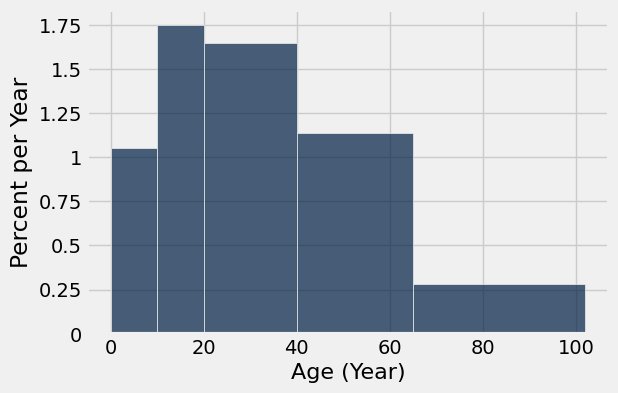

In [90]:
top_movies.hist('Age', bins = my_bins, unit='Year')

# Discussion question
https://ipm.ucanr.edu/calludt.cgi/WXSTATIONDATA?STN=STBARBRA.C

- University of California Statewide Integrated Pest Management Program
- How to Manage Pests: California Weather Data
- Retrieve data in comma delimited data file format
 
Weather database request:  
 
Time Period: January 1, 1993 to January 1, 2023, retrieved on May 2, 2023"
 (10958 days)

|Variable  | Description                  |Units                         |
|:--    | :--| :-- |
|   1      | Database name                |                              |
|   2      | Date: year,month,day         |yyyymmdd"                     |
|   3      | Observation time             |hhmm                          |
|   4      | Precipitation, amount        |Millimeters"                  |
|   5      | Precipitation, type          |(coded)"                      |
|   6      | Air temperature, maximum     |Celsius"                      |
|   7      | Air temperature, minimum     |Celsius"                      |
|   8      | Air temperature, observed    |Celsius"                      |
|   9      | Weather conditions           |(coded)"                      |
|  10      | Wind, direction              |N,NE,E,SE,S,SW,W,NW, 0=calm"  |
|  11      | Wind, speed                  |Meters per second"            |
|  12      | Bulb temperature, wet        |Celsius"                      |
|  13      | Bulb temperature, dry        |Celsius"                      |
|  14      | Soil temperature, maximum    |Celsius"                      |
|  15      | Soil temperature, minimum    |Celsius"                      |
|  16      | Pan evaporation              |Millimeters"                  |
|  17      | Solar radiation              |Watts per sq. meters"         |
|  18      | Reference evapotranspiration |Millimeters"                  |
|  19      | Relative humidity, minimum   |Percent"                      |
|  20      | Relative humidity, maximum   |Percent                       |



Weather Type
Weather type contains information about the weather at the observation time. Also, if a significant weather event occurs during a day, hail or a tornado for instance, the occurrence may be noted in this field.

|Code  | Meaning    |
| :--   | :--|
|C	|Clear	                                   |
|R	|Rain                                      |
|PC	|Partly cloudy	                           |
|R+	|Heavy rain                                |
|CY	|Cloudy	                                   |
|W	|Rain showers                              |
|HZ	|Haze or smoke	                           |
|W+	|Heavy showers                             |
|DS	|Dust storm	                               |
|S	|Snow                                      |
|F	|Fog	                                   |
|S+	|Heavy snow                                |
|F+	|Heavy fog	                               |
|BS	|Blowing snow                              |
|DZ	|Drizzle	                               |
|IP	|Sleet                                     |
|TH	|Thunderstorm	                           |
|HL	|Hail                                      |
|TO	|Tornado	                               |
|SR	|Snow and rain mixed                       |
|T	|Thunder, no rain	                       |
|HW	|High winds                                |
|L	|Lightning, no thunder	DW	Dew present    |

In [143]:
weather = Table.read_table('data/sb_weather2.csv')
weather

Station,Date,Time,Precip,type,Air max,min,obs,Wx,Wind dir,speed,Bulb wet,dry,Soil max,min.1,Evap,Solar,ETo,RH max,min.2
STBARBRA.C,19510101,2400,0,nan,17.2,1.1,11.7,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
STBARBRA.C,19510102,2400,0,nan,16.1,1.1,10.6,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
STBARBRA.C,19510103,2400,0,nan,16.7,3.3,12.8,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
STBARBRA.C,19510104,2400,4.569,nan,15.6,7.2,11.1,R,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
STBARBRA.C,19510105,2400,0,nan,17.8,5.6,12.2,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
STBARBRA.C,19510106,2400,0,nan,22.2,3.9,13.9,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
STBARBRA.C,19510107,2400,0,nan,20.6,1.1,15.6,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
STBARBRA.C,19510108,2400,0,nan,20.6,2.2,15,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
STBARBRA.C,19510109,2400,0,nan,17.2,1.7,11.7,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
STBARBRA.C,19510110,2400,15.22,nan,16.1,4.4,12.8,R,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


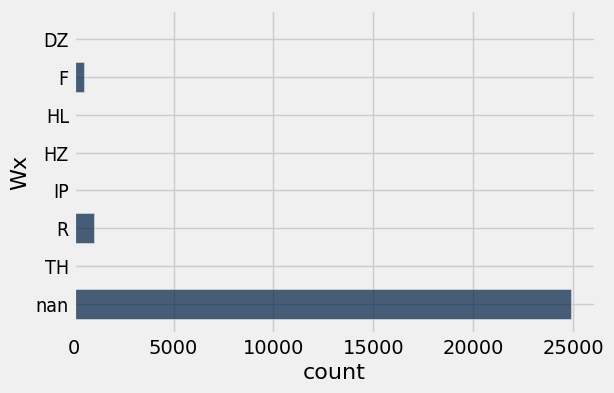

In [162]:
(weather
#    .where('Wx', are.not_equal_to('nan'))
    .group('Wx')
    .barh('Wx', 'count')
)

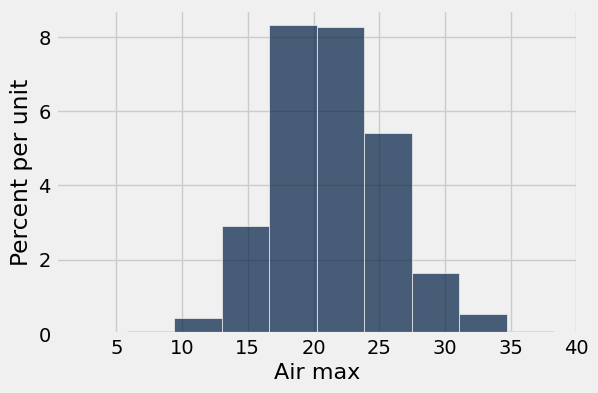

In [135]:
weather.hist('Air max')

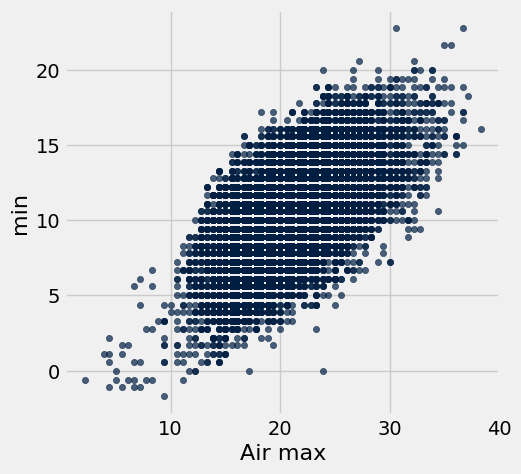

In [137]:
weather.scatter('Air max', 'min')